# **1. 준비된 Custom Dataset 가져오기**

**1-1. 데이터 가져오기**
- VM에 dataset.zip 파일로 업로드 후 압축 풀기

In [1]:
import zipfile

with zipfile.ZipFile('/content/dataset2.zip') as target_file:
    target_file.extractall('/content/dataset2')

In [2]:
!pip install labelme2yolo

In [3]:
import labelme2yolo

In [4]:
!labelme2yolo --json_dir /content/dataset2 --val_size 0.2

INFO:labelme2yolo:Searching label list from json files ...
INFO:labelme2yolo:Converting train set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
INFO:labelme2yolo:Converting val set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
INFO:labelme2yolo:Converting test set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--


**1-2. yaml파일 확인하기**
- yaml 파일은 모델학습에 사용되는 데이터의 위치, 클래스의 수, 클래스명의 정보를 가지고 있다.

In [5]:
!cat /content/dataset2/YOLODataset/dataset.yaml

train: /content/dataset2/YOLODataset/images/train/
val: /content/dataset2/YOLODataset/images/val/
nc: 3
names: ["Apple", "Tomato", "Oriental melon"]

# **2. Custom yaml 파일을 만들자.**

In [6]:
# PyYAML을 설치하자
!pip install PyYAML

In [7]:
import yaml

data_cf = {'train' : '/content/dataset2/YOLODataset/images/train',
           'val' : '/content/dataset2/YOLODataset/images/val',
           'names' : ["Apple", "Tomato", "Oriental melon"],
           'nc' : 3 }

# fruit_data.yaml 이란 이름으로 custom yaml 파일을 만든다.
with open('/content/dataset2/YOLODataset/fruit_data.yaml', 'w') as f:
  yaml.dump(data_cf, f)

# fruit_data.yaml 확인
with open('/content/dataset2/YOLODataset/fruit_data.yaml', 'r') as f:
  fruit_yaml = yaml.safe_load(f)
  display(fruit_yaml)

{'names': ['Apple', 'Tomato', 'Oriental melon'],
 'nc': 3,
 'train': '/content/dataset2/YOLODataset/images/train',
 'val': '/content/dataset2/YOLODataset/images/val'}

# **3. YOLOv8을 사용하기 위한 Setup(셋업)**

In [8]:
# ultralytics 설치
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.1/800.1 kB 19.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [9]:
# ultralytics 를 불러오고 체크
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.53 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.3/78.2 GB disk)


# **4. Custom YOLO Training(학습)**

**Segmentation 모델로 사용할 수 있는 모델의 종류**

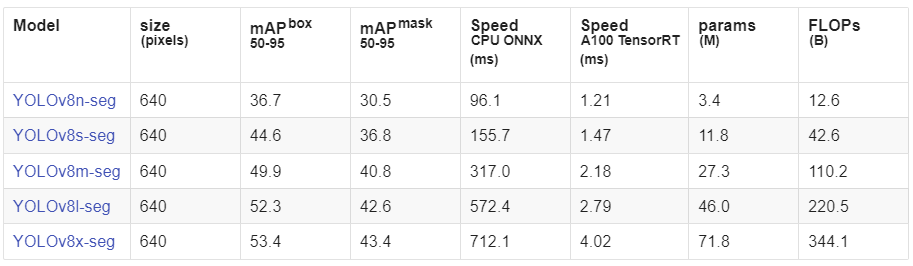

In [10]:
# ultralytics에서 YOLO 모듈을 불러옴
from ultralytics import YOLO
# yolov8n-seg.pt 모델의 아키텍처와 가중치을 함께 불러옴
model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.73M/6.73M [00:00<00:00, 315MB/s]


In [11]:
# 모델이 분류할 수 있는 부류의 수 확인
print(type(model.names), len(model.names))
# 모델이 분류할 수 있는 부류 확인
print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

**불러온 모델 아키텍처를 이용하여 우리가 준비한 Custom Dataset으로 학습을 시켜보자.**

In [12]:
model.train(data='/content/dataset2/YOLODataset/fruit_data.yaml', epochs=100, patience=10, batch=8, imgsz=640)

Ultralytics YOLOv8.2.53 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/dataset2/YOLODataset/fruit_data.yaml, epochs=100, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 30.0MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 362MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/dataset2/YOLODataset/labels/train... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<00:00, 142.90it/s]

train: New cache created: /content/dataset2/YOLODataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset2/YOLODataset/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 129.30it/s]

val: New cache created: /content/dataset2/YOLODataset/labels/val.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      1/100      1.67G     0.4571      1.294      3.288     0.9082        108        640: 100%|██████████| 2/2 [00:04<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all          4         30     0.0121      0.611      0.114      0.101     0.0121      0.611      0.128      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.69G     0.5052      1.221      3.295     0.9209         58        640: 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all          4         30      0.012      0.611     0.0927     0.0744     0.0129      0.632     0.0928     0.0759



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.62G     0.4653      1.298      3.326     0.9152         72        640: 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.82it/s]

                   all          4         30     0.0111       0.59      0.157      0.145     0.0129      0.632      0.176       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.64G     0.4269     0.8277      3.133     0.8905         72        640: 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]

                   all          4         30     0.0117      0.611      0.305      0.272     0.0117      0.611      0.302      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.64G     0.3683     0.5412      2.984     0.8335         83        640: 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all          4         30     0.0134      0.653      0.347      0.332     0.0141      0.681      0.348      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.63G     0.3994       0.49      2.821     0.8407         77        640: 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.67it/s]

                   all          4         30     0.0142      0.674      0.408        0.4      0.015      0.701      0.408      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.72G      0.368     0.4074      2.501      0.855         60        640: 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]

                   all          4         30     0.0177      0.771      0.478       0.46     0.0185      0.792      0.479      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.57G     0.3166     0.3499      2.204     0.8202         64        640: 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all          4         30     0.0229      0.951      0.563      0.502     0.0238      0.972      0.562      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100       1.6G     0.3814     0.4926      2.111     0.8062         79        640: 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all          4         30      0.024      0.972      0.584      0.522      0.024      0.972      0.584      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.69G      0.357     0.3545      1.923     0.8161         80        640: 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.20it/s]

                   all          4         30     0.0248          1      0.573      0.506     0.0248          1      0.573      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.72G     0.3655     0.3534      1.716     0.8159         60        640: 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]

                   all          4         30     0.0252          1      0.492       0.43     0.0252          1      0.492      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.65G     0.3596     0.3706       1.53     0.8251         86        640: 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.16it/s]

                   all          4         30     0.0252          1      0.492       0.43     0.0252          1      0.492      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.71G      0.388     0.3689      1.626     0.8403         63        640: 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]

                   all          4         30     0.0255          1      0.502      0.459     0.0255          1      0.504      0.459



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.81G     0.3632     0.3298      1.424     0.8272         77        640: 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all          4         30      0.371      0.292      0.612      0.581      0.371      0.292      0.612      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.62G     0.4152     0.4234      1.363     0.8513         57        640: 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all          4         30      0.371      0.292      0.612      0.581      0.371      0.292      0.612      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.58G     0.3736     0.3584      1.138     0.8355         70        640: 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]

                   all          4         30      0.784       0.25      0.618      0.592      0.784       0.25      0.618      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.65G       0.41      0.322      1.154     0.8157         76        640: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all          4         30      0.527      0.271      0.614       0.59      0.527      0.271      0.614      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.66G      0.449      0.429      1.065     0.8401         56        640: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all          4         30      0.527      0.271      0.614       0.59      0.527      0.271      0.614      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100       1.8G     0.4068     0.3442      1.096     0.8089        101        640: 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all          4         30      0.379       0.25      0.656      0.626      0.379       0.25      0.656      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.67G     0.3886     0.4041     0.9854     0.8368        104        640: 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]

                   all          4         30      0.379       0.25      0.656      0.626      0.379       0.25      0.656      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.67G     0.3843     0.3704      1.068     0.8312        102        640: 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]


                   all          4         30      0.447       0.25      0.697      0.662      0.447       0.25      0.698      0.677

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.77G     0.3687     0.3321     0.9499     0.8293         76        640: 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]

                   all          4         30      0.447       0.25      0.697      0.662      0.447       0.25      0.698      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.61G      0.394     0.3615     0.9055     0.8504         64        640: 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.46it/s]

                   all          4         30       0.94      0.487      0.808      0.764       0.94      0.487      0.808      0.787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.59G     0.3733     0.3411     0.9186      0.863        104        640: 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.96it/s]

                   all          4         30       0.94      0.487      0.808      0.764       0.94      0.487      0.808      0.787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100       1.6G     0.3591     0.3148     0.7398     0.8408         86        640: 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]


                   all          4         30      0.936      0.578      0.872      0.821      0.936      0.578      0.872      0.855

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.67G     0.3505      0.355     0.7837     0.8031        107        640: 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all          4         30      0.936      0.578      0.872      0.821      0.936      0.578      0.872      0.855



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.64G     0.3305     0.3093     0.7915     0.8111         56        640: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all          4         30      0.936      0.578      0.872      0.821      0.936      0.578      0.872      0.855



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.61G     0.3721     0.3481     0.7963     0.8381        101        640: 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all          4         30      0.838      0.589      0.896      0.844      0.838      0.589      0.896      0.884



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.65G     0.3533     0.3434     0.7125      0.829         79        640: 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all          4         30      0.838      0.589      0.896      0.844      0.838      0.589      0.896      0.884



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.59G     0.3217     0.3186     0.7157     0.8191         89        640: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all          4         30       0.82      0.636      0.923      0.885       0.82      0.636      0.923      0.904

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.61G     0.3885     0.3456     0.7857     0.8257         98        640: 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all          4         30       0.82      0.636      0.923      0.885       0.82      0.636      0.923      0.904



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.57G     0.3281     0.2979     0.6727     0.8237         87        640: 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all          4         30       0.82      0.636      0.923      0.885       0.82      0.636      0.923      0.904



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.73G     0.3456     0.3315     0.6851     0.8063         77        640: 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all          4         30      0.845      0.724       0.95      0.887      0.845      0.724       0.95      0.921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.63G     0.3336     0.3164     0.6535     0.8327         67        640: 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.56it/s]

                   all          4         30      0.845      0.724       0.95      0.887      0.845      0.724       0.95      0.921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.59G     0.3246     0.3311     0.6386     0.8182         71        640: 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]

                   all          4         30      0.845      0.724       0.95      0.887      0.845      0.724       0.95      0.921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.66G     0.3352     0.3198     0.6685     0.8299         91        640: 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]

                   all          4         30      0.846      0.881      0.977      0.908      0.846      0.881      0.977      0.941



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.69G     0.3579     0.3102     0.6812     0.8165        116        640: 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.86it/s]

                   all          4         30      0.846      0.881      0.977      0.908      0.846      0.881      0.977      0.941



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.67G     0.3474     0.3229     0.7129     0.8112         65        640: 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all          4         30      0.846      0.881      0.977      0.908      0.846      0.881      0.977      0.941



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.74G     0.3197     0.2901      0.675     0.8278         48        640: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all          4         30      0.873      0.948      0.985      0.944      0.873      0.948      0.985      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.65G     0.3253     0.2934     0.6136     0.8051         99        640: 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all          4         30      0.873      0.948      0.985      0.944      0.873      0.948      0.985      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100       1.7G     0.3184     0.2911     0.6217     0.8029        108        640: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all          4         30      0.873      0.948      0.985      0.944      0.873      0.948      0.985      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100       1.7G     0.3195     0.3485     0.6377     0.7848        120        640: 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all          4         30      0.917      0.937      0.991      0.972      0.917      0.937      0.991      0.942

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.62G      0.315     0.2869      0.622     0.8368         69        640: 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.67it/s]

                   all          4         30      0.917      0.937      0.991      0.972      0.917      0.937      0.991      0.942



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.65G      0.333     0.3251     0.5985     0.8202         92        640: 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.20it/s]

                   all          4         30      0.917      0.937      0.991      0.972      0.917      0.937      0.991      0.942



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.67G     0.3253     0.2857     0.6023     0.8061         89        640: 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.69it/s]

                   all          4         30      0.917      0.937      0.991      0.972      0.917      0.937      0.991      0.942



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100       1.7G     0.3104     0.2725     0.6015     0.8353         90        640: 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all          4         30      0.975      0.951      0.994      0.971      0.975      0.951      0.994      0.971



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.58G     0.3138     0.3186     0.6377     0.8087         57        640: 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]

                   all          4         30      0.975      0.951      0.994      0.971      0.975      0.951      0.994      0.971



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.62G     0.3298     0.3102     0.6168      0.828         84        640: 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]


                   all          4         30      0.975      0.951      0.994      0.971      0.975      0.951      0.994      0.971

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.61G     0.3257     0.2798     0.6041      0.819         71        640: 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all          4         30      0.975      0.951      0.994      0.971      0.975      0.951      0.994      0.971



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.67G     0.3015     0.2731     0.5928     0.8107         99        640: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all          4         30      0.955      0.987      0.995      0.981      0.955      0.987      0.995      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.63G     0.3027      0.293     0.5831     0.8084         78        640: 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all          4         30      0.955      0.987      0.995      0.981      0.955      0.987      0.995      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.71G     0.3221     0.2868      0.609     0.8223         59        640: 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all          4         30      0.955      0.987      0.995      0.981      0.955      0.987      0.995      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.68G     0.3289     0.3242     0.5759     0.8161         98        640: 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]

                   all          4         30      0.955      0.987      0.995      0.981      0.955      0.987      0.995      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.71G     0.3184     0.2956     0.6627     0.8253         51        640: 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all          4         30      0.956          1      0.995      0.976      0.956          1      0.995      0.971

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.62G     0.3171     0.2907     0.5456     0.8047         77        640: 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.04it/s]

                   all          4         30      0.956          1      0.995      0.976      0.956          1      0.995      0.971



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.61G       0.32     0.3137     0.6126     0.8373         53        640: 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]


                   all          4         30      0.956          1      0.995      0.976      0.956          1      0.995      0.971

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.57G     0.3421     0.3133     0.6479     0.8351         90        640: 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all          4         30      0.956          1      0.995      0.976      0.956          1      0.995      0.971



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.71G     0.3085     0.2828     0.5677     0.7974        101        640: 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]

                   all          4         30      0.956          1      0.995      0.968      0.956          1      0.995      0.972



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.55G     0.3019     0.3032     0.6407     0.8368         53        640: 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]


                   all          4         30      0.956          1      0.995      0.968      0.956          1      0.995      0.972

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.67G      0.282     0.2568     0.5606     0.8093         68        640: 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all          4         30      0.956          1      0.995      0.968      0.956          1      0.995      0.972



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.52G     0.2952     0.2532      0.654     0.8068         80        640: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]


                   all          4         30      0.956          1      0.995      0.968      0.956          1      0.995      0.972

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.63G     0.2783     0.2589     0.5538     0.8194         76        640: 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all          4         30      0.978      0.993      0.995       0.97      0.978      0.993      0.995      0.973



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100       1.8G     0.3132     0.3247      0.614     0.8373         71        640: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all          4         30      0.978      0.993      0.995       0.97      0.978      0.993      0.995      0.973
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 53, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



63 epochs completed in 0.032 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.53 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258649 parameters, 0 gradients, 12.0 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]


                   all          4         30      0.955      0.987      0.995      0.981      0.955      0.987      0.995      0.978
                 Apple          3         16          1      0.962      0.995      0.988          1      0.962      0.995      0.977
                Tomato          3         12      0.975          1      0.995       0.96      0.975          1      0.995      0.963
        Oriental melon          1          2      0.889          1      0.995      0.995      0.889          1      0.995      0.995
Speed: 0.2ms preprocess, 3.9ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/segment/train


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c370e64e260>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04

# **5. Training(학습) 결과 확인**

**학습 결과를 그래프로 저장한 파일을 통해 확인해 본다**

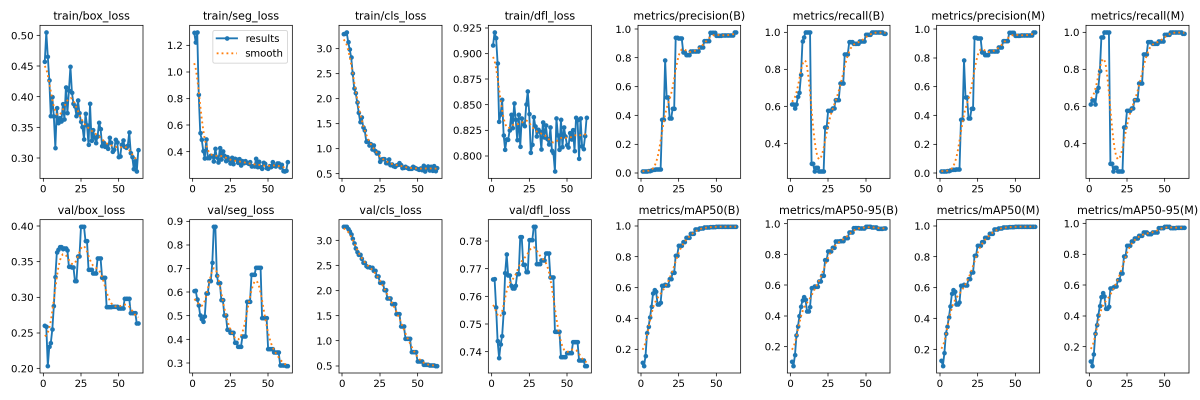

In [13]:
import cv2
from google.colab.patches import cv2_imshow

result_img = cv2.imread('/content/runs/segment/train/results.png')
fix_width = 1200
height,width = result_img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
result_img = cv2.resize(result_img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(result_img)

**Custom 모델이 분류할 수 있는 부류 확인**

In [14]:
# 모델이 분류할 수 있는 부류의 수 확인
print(type(model.names), len(model.names))
# 모델이 분류할 수 있는 부류 확인
print(model.names)

<class 'dict'> 3
{0: 'Apple', 1: 'Tomato', 2: 'Oriental melon'}


# **6. Custom 모델로 Segmentation(분할)**

**Image Segmentation**

In [15]:
# 모델 예측
results = model.predict(source='/content/dataset2/YOLODataset/images/val/04baa4ab034ac40bf2b30c8f76d204bc.png', save=True)


image 1/1 /content/dataset2/YOLODataset/images/val/04baa4ab034ac40bf2b30c8f76d204bc.png: 480x640 7 Apples, 8 Tomatos, 2 Oriental melons, 99.7ms
Speed: 4.1ms preprocess, 99.7ms inference, 7.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/train2


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(


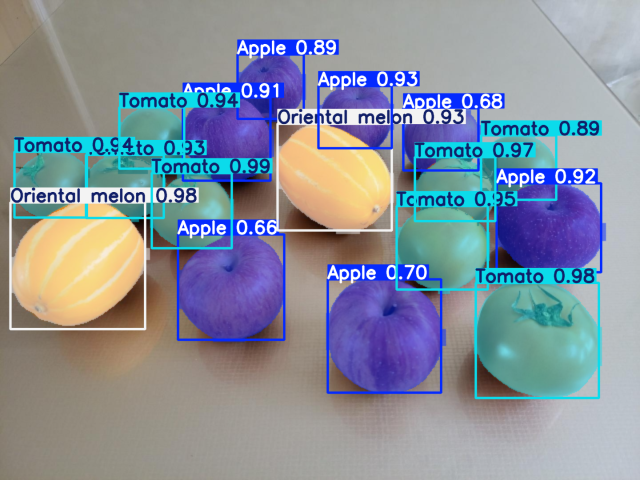

In [16]:
# 예측 이미지 확인
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/runs/segment/train2/04baa4ab034ac40bf2b30c8f76d204bc.png')
fix_width = 640
height,width = img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
img = cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)

**Video Segmentation**

In [17]:
# 동영상 예측
results = model.predict(source='/content/fruit.mp4', save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/892) /content/fruit.mp4: 384x640 1 Tomato, 1 Oriental melon, 119.9ms
video 1/1 (frame 2/892) /content/fruit.mp4: 384x640 1 Tomato, 1 Oriental melon, 16.8ms
video 1/1 (frame 3/892) /content/fruit.mp4: 384x640 1 Tomato, 1 Oriental melon, 13.1ms
video 1/1 (frame 4/892) /content/fruit.mp4: 384x640 1 Tomato, 1 Oriental melon, 12.2ms
video 1/1 (frame 5/892) /content/fruit.mp4: 384x640 1 Tomato, 1 Oriental melon, 13.4ms
video 1/1 (frame 6/8

In [18]:
# 코랩에서 영상을 보여줄 준비
import io
from IPython.display import HTML
from base64 import b64encode
def show_video(file_name, width=640):
  # show resulting deepsort video
  mp4 = open(file_name,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
  <video width="{0}" controls>
        <source src="{1}" type="video/mp4">
  </video>
  """.format(width, data_url))

In [19]:
# avi 파일을 mp4 파일로 변환 후 영상을 보여줌
import os
path_video = os.path.join("/content/runs/segment/train3","fruit.avi")
%cd /content/runs/segment/train3
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!ffmpeg -y -loglevel panic -i "fruit.avi" "fruit.mp4"
%cd ../../../

# output object tracking video
path_output = os.path.join("/content/runs/segment/train3","fruit.mp4")
show_video(path_output, width=640)

Output hidden; open in https://colab.research.google.com to view.

# **7. 학습된 모델을 불러와 검출**

In [ ]:
# ultralytics 설치
!pip install ultralytics

# ultralytics 를 불러오고 체크
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [20]:
# ultralytics에서 YOLO 모듈을 불러옴
from ultralytics import YOLO
# 학습된 모델의 아키텍처와 가중치을 함께 불러옴
model = YOLO('/content/runs/segment/train/weights/best.pt')

In [21]:
# 모델이 분류할 수 있는 부류의 수 확인
print(type(model.names), len(model.names))
# 모델이 분류할 수 있는 부류 확인
print(model.names)

<class 'dict'> 3
{0: 'Apple', 1: 'Tomato', 2: 'Oriental melon'}


In [22]:
# 모델 예측
results = model.predict(source='/content/dataset2/YOLODataset/images/val/04baa4ab034ac40bf2b30c8f76d204bc.png', save=True)


image 1/1 /content/dataset2/YOLODataset/images/val/04baa4ab034ac40bf2b30c8f76d204bc.png: 480x640 7 Apples, 8 Tomatos, 2 Oriental melons, 18.3ms
Speed: 3.8ms preprocess, 18.3ms inference, 8.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict


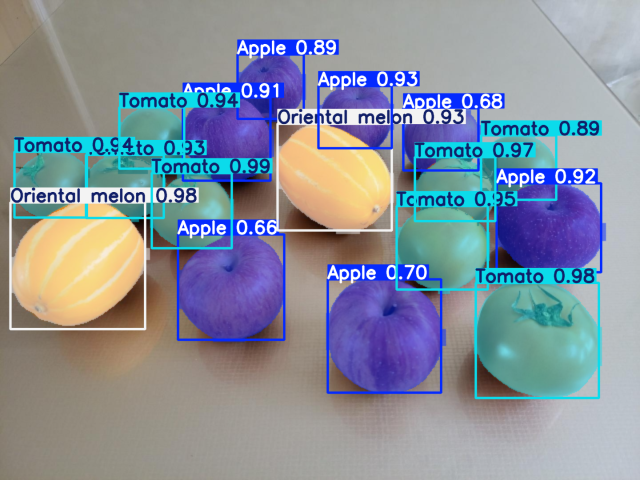

In [23]:
# 예측 이미지 확인
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/runs/segment/predict/04baa4ab034ac40bf2b30c8f76d204bc.png')
fix_width = 640
height,width = img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
img = cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)